Données extraites pour /Users/ouldbouali/Loupommedeterre/MAST_2025-01-06T1449/TESS/tess2020212050318-s0028-0000000181880034-0190-s/tess2020212050318-s0028-0000000181880034-0190-s_lc.fits: forme = (18182,)


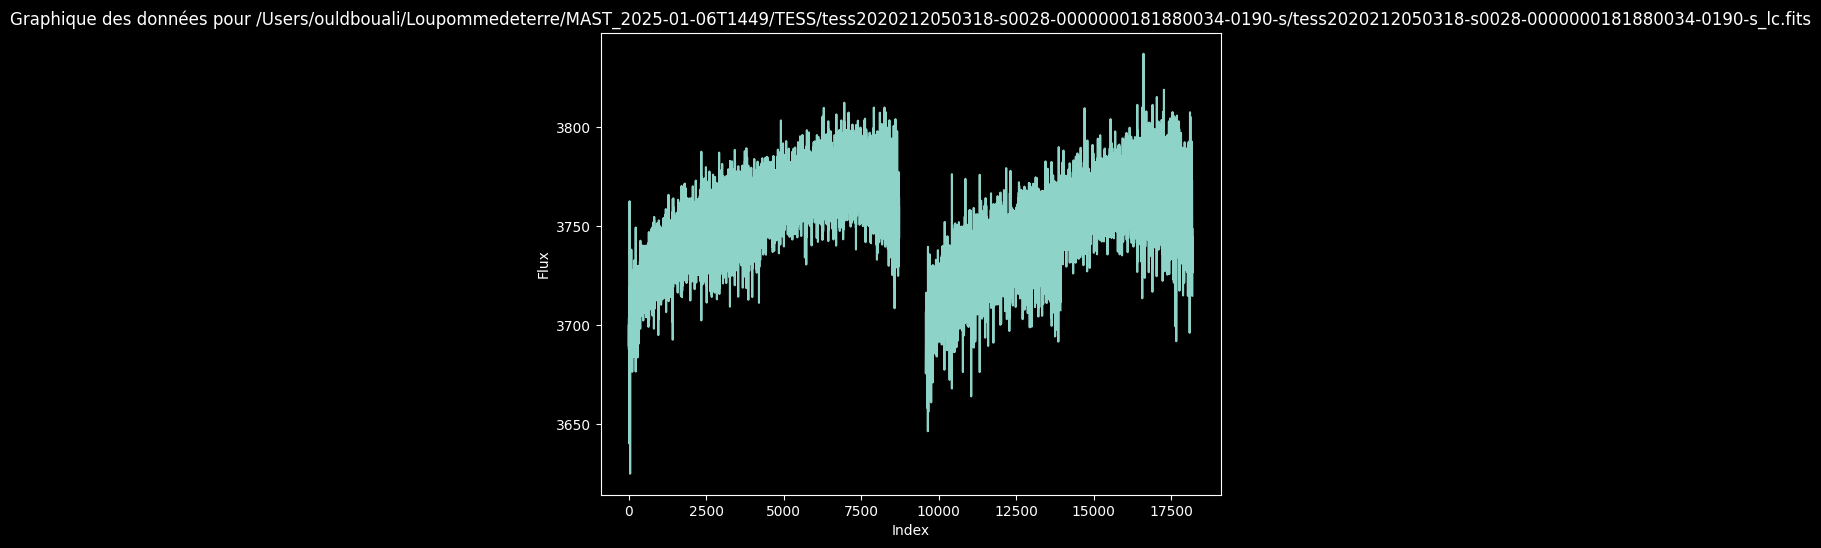

Données extraites pour /Users/ouldbouali/Loupommedeterre/MAST_2025-01-06T1449/TESS/tess2020212050318-s0028-0000000181880034-0190-s/tess2020212050318-s0028-0000000181880034-0190-s_tp.fits: forme = (18182, 11, 11)


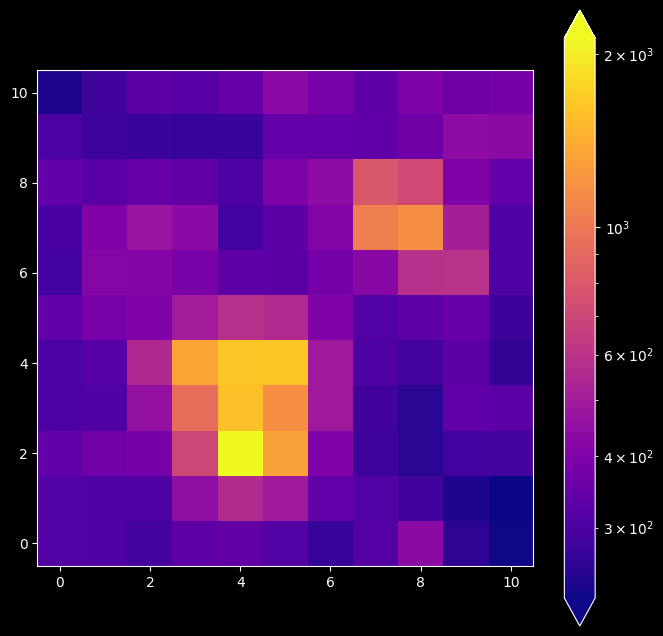

In [21]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fichiers_fits = [
    '/Users/ouldbouali/Loupommedeterre/MAST_2025-01-06T1449/TESS/tess2020212050318-s0028-0000000181880034-0190-s/tess2020212050318-s0028-0000000181880034-0190-s_lc.fits',
    '/Users/ouldbouali/Loupommedeterre/MAST_2025-01-06T1449/TESS/tess2020212050318-s0028-0000000181880034-0190-s/tess2020212050318-s0028-0000000181880034-0190-s_tp.fits'
]

plt.style.use('dark_background')

canaux = []

for fichier in fichiers_fits:
    # Ouverture du fichier FITS
    hdul = fits.open(fichier)
    data = hdul[1].data

    # Vérifiez si 'SAP_FLUX' est une colonne disponible, puis extrayez cette colonne
    if 'SAP_FLUX' in data.columns.names:
        flux_data = data['SAP_FLUX']
    else:
        # Vous pouvez également explorer une autre colonne comme 'FLUX' si 'SAP_FLUX' n'est pas présente
        flux_data = data['FLUX']

    print(f"Données extraites pour {fichier}: forme = {flux_data.shape}")

    # Si les données sont de forme (18182, 11, 11), on peut prendre un plan 2D pour l'affichage
    if flux_data.ndim == 3:
        # On prend la première image pour affichage
        flux_image = flux_data[0]  # Première image (par exemple)
        canaux.append(flux_image)
    elif flux_data.ndim == 1:
        # Si c'est un vecteur 1D, afficher un graphique (par exemple, un histogramme)
        plt.figure(figsize=(8, 6))
        plt.plot(flux_data)
        plt.title(f"Graphique des données pour {fichier}")
        plt.xlabel("Index")
        plt.ylabel("Flux")
        plt.show()

# Si nous avons des données 2D à afficher
if len(canaux) > 0:
    couleurs = ['plasma', 'cubehelix', "magma"]
    plt.figure(figsize=(8,8))
    for image in range(len(canaux)):
        plt.imshow(canaux[image], cmap=couleurs[image], origin='lower', norm=LogNorm())

    plt.colorbar(extend='both')
    plt.show()

